In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

#Building Block 1   ==========================================================
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

#Building Block 2   ==========================================================
x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

#Building Block 3   ==========================================================
x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])
#=============================================================================
x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="RNN")
model.summary()

Model: "RNN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_1 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 9, 9, 64)     0           ['conv2d_1[0][0]']               
                                                                                                

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
history = model.fit(x_train[:2500], y_train[:2500], batch_size=64, epochs=25, validation_split=0.2)

Epoch 1/25
32/32 [==============================] - 5s 134ms/step - loss: 1.8292 - accuracy: 0.3205 - val_loss: 1.9659 - val_accuracy: 0.2720
Epoch 2/25
32/32 [==============================] - 4s 112ms/step - loss: 1.7069 - accuracy: 0.3410 - val_loss: 1.6526 - val_accuracy: 0.3700
Epoch 3/25
32/32 [==============================] - 4s 118ms/step - loss: 1.6939 - accuracy: 0.3540 - val_loss: 1.7664 - val_accuracy: 0.3520
Epoch 4/25
32/32 [==============================] - 4s 133ms/step - loss: 1.6554 - accuracy: 0.3580 - val_loss: 1.7628 - val_accuracy: 0.3280
Epoch 5/25
32/32 [==============================] - 4s 128ms/step - loss: 1.6059 - accuracy: 0.3910 - val_loss: 1.6517 - val_accuracy: 0.3580
Epoch 6/25
32/32 [==============================] - 8s 254ms/step - loss: 1.6067 - accuracy: 0.3950 - val_loss: 1.5466 - val_accuracy: 0.4220
Epoch 7/25
32/32 [==============================] - 9s 273ms/step - loss: 1.5547 - accuracy: 0.4125 - val_loss: 1.6736 - val_accuracy: 0.3420
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


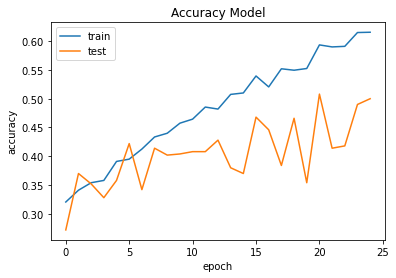

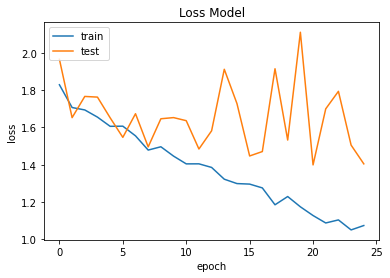

In [5]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()